## 필수 함수

In [96]:
#엑셀 파일 불러오는 함수
import pandas as pd

def load_and_clean_data(filepath, header):
    df = pd.read_excel(filepath, header = header)

    new_columns = []
    for col in df.columns:
        merged_name = [str(c) for c in col if 'Unnamed' not in str(c)]
        new_columns.append(' '.join(merged_name).strip())

    df.columns = new_columns
    df= df.fillna(method='ffill', axis=0)

    return df

In [97]:
def clean_col_name(df, cols):
    df = df.copy()
    for col in cols:
        df[col] = (
            df[col]
            .astype(str)                                   # NaN 대비
            .str.replace('·', '', regex=False)
            .str.replace('・', '', regex=False)
            .str.replace('?', '', regex=False)
            .str.strip()
            .str.replace(' ', '', regex=False)             # 모든 띄어쓰기 제거
        )
    return df

## 교육

In [98]:
df_origin = pd.read_excel(r"C:\Users\윤서현\Desktop\8페이지\09118페이지1번병합.xlsx")

In [99]:
df_origin

,학교,기준연도,설립구분,지역,상태,취업률,교원연구(국내),교원연구(SCI),교원연구(저역서),학교종류,...,외국인 학생수,1인당 교육비,장학금,등록금,재적학생,중도탈락률,재학생 충원율,상태정보,전임교원확보율,전임교원강의비율
0,가야대학교(고령)_제2캠퍼스,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
1,가야대학교(김해),2023,사립,경남,기존,76.2,0.6330,0.0184,0.1276,대학교,...,17.0,14267106.3,4000371.0,6833449.7,2153.0,9.6,75.75,기존,71.03,69.40
2,가천대학교,2023,사립,경기,기존,69.6,0.3106,0.7838,0.0482,대학교,...,2743.0,15535540.1,3453285.5,8330044.3,27102.0,3.6,96.95,기존,103.76,61.20
3,가톨릭관동대학교,2023,사립,강원,기존,64.6,0.4225,0.1665,0.0495,대학교,...,83.0,15253227.9,3753431.8,7185831.2,9398.0,9.2,68.75,기존,94.19,78.20
4,가톨릭꽃동네대학교,2023,사립,충북,기존,74.4,0.6757,0.0900,0.5854,대학교,...,2.0,19519867.8,5503651.4,7397203.7,554.0,5.2,89.50,기존,85.19,72.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,호원대학교,2023,사립,전북,기존,75.0,0.4276,0.0178,0.0944,산업대학,...,917.0,11675820.2,4508111.4,6952472.6,6436.0,11.4,77.35,기존,69.77,45.75
250,홍익대학교,2023,사립,서울,기존,65.5,0.6880,0.2757,0.0669,대학교,...,1562.0,12747502.2,3946184.8,8397128.3,17018.0,3.8,99.55,기존,75.18,66.30
251,홍익대학교_제2캠퍼스,2023,사립,세종,기존,63.7,0.4799,0.3702,0.0263,NaN,...,96.0,NaN,4413700.7,8494783.0,7851.0,5.0,95.55,기존,71.21,68.50
252,화성의과학대학교,2023,사립,경기,기존,71.1,0.4715,0.1970,0.0229,대학교,...,NaN,14621002.6,1091142.1,6970514.2,574.0,16.6,36.30,기존,60.42,65.25


In [100]:
df_origin.head()

,학교,기준연도,설립구분,지역,상태,취업률,교원연구(국내),교원연구(SCI),교원연구(저역서),학교종류,...,외국인 학생수,1인당 교육비,장학금,등록금,재적학생,중도탈락률,재학생 충원율,상태정보,전임교원확보율,전임교원강의비율
0,가야대학교(고령)_제2캠퍼스,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
1,가야대학교(김해),2023,사립,경남,기존,76.2,0.6330,0.0184,0.1276,대학교,...,17.0,14267106.3,4000371.0,6833449.7,2153.0,9.6,75.75,기존,71.03,69.40
2,가천대학교,2023,사립,경기,기존,69.6,0.3106,0.7838,0.0482,대학교,...,2743.0,15535540.1,3453285.5,8330044.3,27102.0,3.6,96.95,기존,103.76,61.20
3,가톨릭관동대학교,2023,사립,강원,기존,64.6,0.4225,0.1665,0.0495,대학교,...,83.0,15253227.9,3753431.8,7185831.2,9398.0,9.2,68.75,기존,94.19,78.20
4,가톨릭꽃동네대학교,2023,사립,충북,기존,74.4,0.6757,0.0900,0.5854,대학교,...,2.0,19519867.8,5503651.4,7397203.7,554.0,5.2,89.50,기존,85.19,72.65


In [101]:
df_origin.columns

Index(['학교', '기준연도', '설립구분', '지역', '상태', '취업률', '교원연구(국내)', '교원연구(SCI)',
       '교원연구(저역서)', '학교종류', '신입생 충원율', '신입생 경쟁률', '외국인 학생수', '1인당 교육비', '장학금',
       '등록금', '재적학생', '중도탈락률', '재학생 충원율', '상태정보', '전임교원확보율', '전임교원강의비율'],
      dtype='object')

In [102]:
#유지 취업률
keeping = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_5-다. 졸업생의 취업 현황_학교별자료.xlsx", header = [3,4,5,6,7])

keeping['연도'] = keeping['연도'].astype(int)
keeping_selected = keeping[['연도','설립구분','지역','상태','학교명','유지\n취업률 4차 계']]
keeping_selected.rename(columns = {'유지\n취업률 4차 계' : '유지취업률'}, inplace = True)

keeping_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25896\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)
C:\Users\윤서현\AppData\Local\Temp\ipykernel_25896\4094146965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keeping_selected.rename(columns = {'유지\n취업률 4차 계' : '유지취업률'}, inplace = True)


,연도,설립구분,지역,상태,학교명,유지취업률
0,2023,사립,경남,기존,가야대학교(김해),79.9
1,2023,사립,경기,기존,가천대학교,78.3
2,2023,사립,강원,기존,가톨릭관동대학교,74.7
3,2023,사립,충북,기존,가톨릭꽃동네대학교,86.2
4,2023,사립,경기,기존,가톨릭대학교,80.4


## 연구

In [103]:
#1인당 연구비
research_money = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_12-가. 연구비 수혜 실적_학교별자료.xlsx", header = [3,4,5,6,7])

research_money['기준연도'] = research_money['기준연도'].astype(int)
#교내연구비계산
research_money['교내연구비'] = research_money['연구비 지원 교내 연구비 남'] + research_money['연구비 지원 교내 연구비 여'] 

#교외연구비계산
research_money['교외연구비'] = research_money['연구비 지원 교외 중앙정부 연구비 남'] + research_money['연구비 지원 교외 중앙정부 연구비 여'] + \
    research_money['연구비 지원 교외 지자체 연구비 남'] + research_money['연구비 지원 교외 지자체 연구비 여'] + \
    research_money['연구비 지원 교외 민간 연구비 남'] + research_money['연구비 지원 교외 민간 연구비 여'] +\
    research_money['연구비 지원 교외 외국 연구비 남'] + research_money['연구비 지원 교외 외국 연구비 여']

#총교원수 계산
research_money['총교원수'] = research_money['전임\n교원 남'] + research_money['전임\n교원 여']


#1인당 연구비 계산
research_money['교내 1인당 연구비(천원)'] = (research_money['교내연구비'] / research_money['총교원수'])
research_money['교외 1인당 연구비(천원)'] = (research_money['교외연구비'] / research_money['총교원수'])

research_money_selected = research_money[['기준연도','설립구분','지역','상태','학교','교내 1인당 연구비(천원)','교외 1인당 연구비(천원)']].copy()
research_money_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25896\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,설립구분,지역,상태,학교,교내 1인당 연구비(천원),교외 1인당 연구비(천원)
0,2023,사립,경남,기존,가야대학교(김해),1078.571429,4468.000000
1,2023,사립,경기,기존,가천대학교,10754.657114,104494.007165
2,2023,사립,강원,기존,가톨릭관동대학교,1541.679666,33463.417827
3,2023,사립,충북,기존,가톨릭꽃동네대학교,1250.000000,5360.375000
4,2023,사립,경기,기존,가톨릭대학교,2484.615385,55214.038462


In [104]:
#졸업생 진학률
graduate = keeping.copy()
graduate_selected = graduate[['연도','설립구분','지역','상태','학교명','졸업자(A) 남', '졸업자(A) 여','진학자(C) 남', '진학자(C) 여']].copy()
graduate_selected['졸업자'] = graduate_selected['졸업자(A) 남'] + graduate_selected['졸업자(A) 여']
graduate_selected['진학자'] = graduate_selected['진학자(C) 남'] + graduate_selected['진학자(C) 여']

graduate_selected['진학률'] = graduate_selected['진학자'] / graduate_selected['졸업자']

graduate_final = graduate_selected[['연도','설립구분','지역','상태','학교명','진학률']].copy()
graduate_final.head()

,연도,설립구분,지역,상태,학교명,진학률
0,2023,사립,경남,기존,가야대학교(김해),0.001912
1,2023,사립,경기,기존,가천대학교,0.063963
2,2023,사립,강원,기존,가톨릭관동대학교,0.044118
3,2023,사립,충북,기존,가톨릭꽃동네대학교,0.010870
4,2023,사립,경기,기존,가톨릭대학교,0.101932


## 산학창업

In [105]:
#산업체경력전임교원수
ppro = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_12-아. 산업체 경력 전임교원 현황_학교별자료.xlsx", header = [3,4,5])

ppro['기준연도'] = ppro['기준연도'].astype(int)
ppro_selected = ppro[['기준연도','설립구분','지역','상태','학교','5년 이내 신규임용 전임교원 산업체 경력 전임교원 1년 미만',
       '5년 이내 신규임용 전임교원 산업체 경력 전임교원 1년 ~ 3년 미만',
       '5년 이내 신규임용 전임교원 산업체 경력 전임교원 3년 ~ 5년 미만',
       '5년 이내 신규임용 전임교원 산업체 경력 전임교원 5년~10년미만',
       '5년 이내 신규임용 전임교원 산업체 경력 전임교원 10년 이상']].copy()

ppro_selected['산업체경력전임교원수'] = ppro_selected['5년 이내 신규임용 전임교원 산업체 경력 전임교원 1년 미만'] + ppro_selected['5년 이내 신규임용 전임교원 산업체 경력 전임교원 1년 ~ 3년 미만'] + ppro_selected['5년 이내 신규임용 전임교원 산업체 경력 전임교원 3년 ~ 5년 미만']\
                                   + ppro_selected['5년 이내 신규임용 전임교원 산업체 경력 전임교원 5년~10년미만'] + ppro_selected['5년 이내 신규임용 전임교원 산업체 경력 전임교원 10년 이상']

ppro_final = ppro_selected[['기준연도','설립구분','지역','상태','학교','산업체경력전임교원수']].copy()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25896\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


In [106]:
#기술이전 수입료
tech = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_12-타. 기술이전 수입료 및 계약 실적_학교별자료.xlsx", header = 3)

tech.rename(columns = {'기 준 연 도' : '기준연도',
                       '학 교 종 류' : '학교종류',
                       '설 립 구 분' : '설립구분',
                       '지 역' : '지역',
                       '상 태' : '상태',
                       '학 교 명' : '학교명',
                       '건 수' : '건수',
                       '수 입 료   ( 원 )' : '수입료(원)'}, inplace = True)

tech_selected = tech[['기준연도','설립구분','지역','상태','학교명','수입료(원)']].copy()
tech_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25896\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,설립구분,지역,상태,학교명,수입료(원)
0,2023,사립,경남,기존,가야대학교(김해),0
1,2023,사립,경기,기존,가천대학교,965127272
2,2023,사립,강원,기존,가톨릭관동대학교,226161515
3,2023,사립,경기,기존,가톨릭대학교,1109571817
4,2023,국립,강원,기존,강원대학교,2555339626


In [107]:
#현장실습이수학생수
compa = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_12-카-1. 현장실습 운영 현황_학교별자료.xlsx", header = [3,4,5,6])

compa['기준연도'] = compa['기준연도'].astype(int)
compa_selected = compa[['기준연도', '학교', '설립구분', '지역', '상태', '실습기간 4주 이상 이수학생 수','실습기간 8주 이상 이수학생 수','실습기간 12주 이상 이수학생 수']]

compa_selected['현장실습 이수학생 수 곱셈'] = compa_selected['실습기간 4주 이상 이수학생 수'] + compa_selected['실습기간 8주 이상 이수학생 수']*2 + compa_selected['실습기간 12주 이상 이수학생 수']*3

compa_final = compa_selected[['기준연도','학교','설립구분','지역','상태','현장실습 이수학생 수 곱셈']].copy()
compa_final.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25896\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)
C:\Users\윤서현\AppData\Local\Temp\ipykernel_25896\3187064151.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compa_selected['현장실습 이수학생 수 곱셈'] = compa_selected['실습기간 4주 이상 이수학생 수'] + compa_selected['실습기간 8주 이상 이수학생 수']*2 + compa_selected['실습기간 12주 이상 이수학생 수']*3


,기준연도,학교,설립구분,지역,상태,현장실습 이수학생 수 곱셈
0,2023,가천대학교,사립,경기,기존,1261
1,2023,가톨릭관동대학교,사립,강원,기존,488
2,2023,가톨릭대학교,사립,경기,기존,605
3,2023,강남대학교,사립,경기,기존,60
4,2023,강원대학교,국립,강원,기존,464


In [108]:
#캡스톤디자인
caps = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_12-카-2. 캡스톤 디자인(창의적 설계) 운영 현황_학교별자료.xlsx", header = [3,4,5] )

caps['기준연도'] = caps['기준연도'].astype(int)

# '이수\n학생수(명) 타학과 계열 인문·사회', '이수\n학생수(명) 타학과 계열 자연과학','이수\n학생수(명) 타학과 계열 공학', '이수\n학생수(명) 타학과 계열 의학','이수\n학생수(명) 타학과 계열 예·체능'
caps['캡스톤디자인이수학생수'] = (caps['이수\n학생수(명) 해당학과'] + caps['이수\n학생수(명) 타학과 계열 인문·사회'] + caps['이수\n학생수(명) 타학과 계열 자연과학'] + caps['이수\n학생수(명) 타학과 계열 공학'] 
                    + caps['이수\n학생수(명) 타학과 계열 의학'] + caps['이수\n학생수(명) 타학과 계열 예·체능'])

caps_selected = caps[['기준연도','학교종류','설립구분','지역','상태','학교','캡스톤디자인이수학생수']].copy()
caps_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25896\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,학교종류,설립구분,지역,상태,학교,캡스톤디자인이수학생수
0,2023,대학교,사립,경남,기존,가야대학교(김해),8
1,2023,대학교,사립,경기,기존,가천대학교,751
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,1993
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,36
4,2023,대학교,사립,경기,기존,가톨릭대학교,800


In [109]:
#학생창업자수
student_startup = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_12-하-1-(2). 학생의 창업 및 창업지원 현황_학교별자료.xlsx", header = [3,4,5])
student_startup['기준연도'] = student_startup['기준연도'].astype(int)

student_startup_selected = student_startup[['기준연도','학교종류','설립구분','지역','상태','학교','학생창업현황 창업자 수']].copy()
student_startup_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25896\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,학교종류,설립구분,지역,상태,학교,학생창업현황 창업자 수
0,2023,대학교,사립,경남,기존,가야대학교(김해),0
1,2023,대학교,사립,경기,기존,가천대학교,57
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,5
3,2023,대학교,사립,경기,기존,가톨릭대학교,3
4,2023,대학교,사립,경기,기존,강남대학교,12


In [110]:
#교원창업자 수
prof_startup = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_12-하-1-(1). 교원의 창업 및 창업지원 현황_학교별자료.xlsx", header = [3,4,5])
prof_startup['기준연도'] = prof_startup['기준연도'].astype(int)

prof_startup_selected = prof_startup[['기준연도','학교종류','설립구분','지역','상태','학교','교원 창업 현황 창업자 수']].copy()
prof_startup_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25896\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,학교종류,설립구분,지역,상태,학교,교원 창업 현황 창업자 수
0,2023,대학교,사립,경남,기존,가야대학교(김해),0
1,2023,대학교,사립,경기,기존,가천대학교,5
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,4
3,2023,대학교,사립,경기,기존,가톨릭대학교,0
4,2023,대학교,사립,서울,기존,가톨릭대학교 _제2캠퍼스,0


In [111]:
#학생창업 지원액
student_startup_money = student_startup[['기준연도','학교종류','설립구분','지역','상태','학교','학생창업 지원현황 지원액 (원) 교비','학생창업 지원현황 지원액 (원) 정부 및 지자체 지원']].copy()
student_startup_money['학생창업 지원액'] = student_startup_money['학생창업 지원현황 지원액 (원) 교비'] + student_startup_money['학생창업 지원현황 지원액 (원) 정부 및 지자체 지원']

student_startup_money.drop(columns = ['학생창업 지원현황 지원액 (원) 교비','학생창업 지원현황 지원액 (원) 정부 및 지자체 지원'], inplace = True)

## 글로벌

In [112]:
#학생 1인당 외국인 전임교원 수
#외국인 전임교원 수
foreign_prof = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_6-다-1. 국가별 외국인 전임교원 현황_학교별자료.xlsx", header = [3,4,5])
foreign_prof['외국인 전임교원'] = foreign_prof['전임교원 계 남'] + foreign_prof['전임교원 계 여']

foreign_prof_grouped = foreign_prof.groupby("학교", as_index=False)["외국인 전임교원"].sum()
foreign_prof_unique = foreign_prof.drop_duplicates("학교")
foreign_prof_final = pd.merge(foreign_prof_unique[["학교"]], foreign_prof_grouped, on="학교", how="left")
foreign_prof_final = clean_col_name(foreign_prof_final, ['학교'])
student_num = df_origin[['학교','재적학생']].copy()
student_num = clean_col_name(student_num,['학교'])

# 1. 두 데이터프레임을 학교 기준으로 합치기
foreign_merage = pd.merge(
    foreign_prof_final, 
    student_num, 
    on="학교", 
    how="left"
)

# 2. 학생 1인당 외국인 전임교원 수 계산
foreign_merage["학생 1인당 외국인 전임교원 수"] = (
    foreign_merage["외국인 전임교원"] / foreign_merage["재적학생"]
)

foreign_merage.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25896\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,학교,외국인 전임교원,재적학생,학생 1인당 외국인 전임교원 수
0,가야대학교(김해),3,2153.0,0.001393
1,가천대학교,127,27102.0,0.004686
2,가톨릭관동대학교,2,9398.0,0.000213
3,가톨릭대학교,10,9546.0,0.001048
4,가톨릭대학교_제2캠퍼스,6,966.0,0.006211


In [113]:
#외국인 학생 수
foreign_student = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_4-바-1. 외국학생 현황_학교별자료.xlsx", header = [3,4,5,6])
foreign_student['기준연도'] = foreign_student['기준연도'].astype(int)

foreign_student_selected = foreign_student[['기준연도','학교종류','설립구분','지역','상태','학교','계\n(D=A+B+C)']].copy()
foreign_student_selected.rename(columns = {'계\n(D=A+B+C)' : '외국인 학생 수'}, inplace = True)

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25896\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


In [114]:
#외국인 중도 탈락률
foreign_drop = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_4-바-2. 외국학생 중도탈락 현황_학교별자료.xlsx", header = [3,4,5])
foreign_drop['기준연도'] = foreign_drop['기준연도'].astype(int)

foreign_drop_selected = foreign_drop[['기준연도','설립구분','지역','상태','학교','외국 학생 중도탈락률(%)(B/A)×100']].copy()
foreign_drop_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25896\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,설립구분,지역,상태,학교,외국 학생 중도탈락률(%)(B/A)×100
0,2023,사립,경남,기존,가야대학교(김해),17.6
1,2023,사립,경기,기존,가천대학교,5.0
2,2023,사립,강원,기존,가톨릭관동대학교,0.0
3,2023,사립,충북,기존,가톨릭꽃동네대학교,0.0
4,2023,사립,경기,기존,가톨릭대학교,2.7


## 병합하기

In [115]:
df_origin.columns

Index(['학교', '기준연도', '설립구분', '지역', '상태', '취업률', '교원연구(국내)', '교원연구(SCI)',
       '교원연구(저역서)', '학교종류', '신입생 충원율', '신입생 경쟁률', '외국인 학생수', '1인당 교육비', '장학금',
       '등록금', '재적학생', '중도탈락률', '재학생 충원율', '상태정보', '전임교원확보율', '전임교원강의비율'],
      dtype='object')

In [116]:
df_origin

,학교,기준연도,설립구분,지역,상태,취업률,교원연구(국내),교원연구(SCI),교원연구(저역서),학교종류,...,외국인 학생수,1인당 교육비,장학금,등록금,재적학생,중도탈락률,재학생 충원율,상태정보,전임교원확보율,전임교원강의비율
0,가야대학교(고령)_제2캠퍼스,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
1,가야대학교(김해),2023,사립,경남,기존,76.2,0.6330,0.0184,0.1276,대학교,...,17.0,14267106.3,4000371.0,6833449.7,2153.0,9.6,75.75,기존,71.03,69.40
2,가천대학교,2023,사립,경기,기존,69.6,0.3106,0.7838,0.0482,대학교,...,2743.0,15535540.1,3453285.5,8330044.3,27102.0,3.6,96.95,기존,103.76,61.20
3,가톨릭관동대학교,2023,사립,강원,기존,64.6,0.4225,0.1665,0.0495,대학교,...,83.0,15253227.9,3753431.8,7185831.2,9398.0,9.2,68.75,기존,94.19,78.20
4,가톨릭꽃동네대학교,2023,사립,충북,기존,74.4,0.6757,0.0900,0.5854,대학교,...,2.0,19519867.8,5503651.4,7397203.7,554.0,5.2,89.50,기존,85.19,72.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,호원대학교,2023,사립,전북,기존,75.0,0.4276,0.0178,0.0944,산업대학,...,917.0,11675820.2,4508111.4,6952472.6,6436.0,11.4,77.35,기존,69.77,45.75
250,홍익대학교,2023,사립,서울,기존,65.5,0.6880,0.2757,0.0669,대학교,...,1562.0,12747502.2,3946184.8,8397128.3,17018.0,3.8,99.55,기존,75.18,66.30
251,홍익대학교_제2캠퍼스,2023,사립,세종,기존,63.7,0.4799,0.3702,0.0263,NaN,...,96.0,NaN,4413700.7,8494783.0,7851.0,5.0,95.55,기존,71.21,68.50
252,화성의과학대학교,2023,사립,경기,기존,71.1,0.4715,0.1970,0.0229,대학교,...,NaN,14621002.6,1091142.1,6970514.2,574.0,16.6,36.30,기존,60.42,65.25


In [117]:
keeping_selected.rename(columns = {'학교명' : '학교',
                                   '연도' : '기준연도'}, inplace = True)
keeping_selected = clean_col_name(keeping_selected, ['학교'])
keeping_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25896\3021535470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keeping_selected.rename(columns = {'학교명' : '학교',


,기준연도,설립구분,지역,상태,학교,유지취업률
0,2023,사립,경남,기존,가야대학교(김해),79.9
1,2023,사립,경기,기존,가천대학교,78.3
2,2023,사립,강원,기존,가톨릭관동대학교,74.7
3,2023,사립,충북,기존,가톨릭꽃동네대학교,86.2
4,2023,사립,경기,기존,가톨릭대학교,80.4


In [118]:
merge_first = pd.merge(df_origin, keeping_selected, on = ['기준연도','설립구분', '지역','상태','학교'],how = 'outer')

In [119]:
merge_first.head()

,학교,기준연도,설립구분,지역,상태,취업률,교원연구(국내),교원연구(SCI),교원연구(저역서),학교종류,...,1인당 교육비,장학금,등록금,재적학생,중도탈락률,재학생 충원율,상태정보,전임교원확보율,전임교원강의비율,유지취업률
0,서울시립대학교,2023,공립,서울,기존,67.2,0.5561,0.4104,0.0884,대학교,...,20126574.7,2249961.1,2395890.4,11900.0,2.9,109.75,기존,89.64,53.40,88.4
1,강원대학교,2023,국립,강원,기존,57.6,0.5246,0.5223,0.0597,대학교,...,22479430.0,2811111.3,4102933.2,19923.0,3.1,98.15,기존,96.65,60.55,77.8
2,강원대학교_제2캠퍼스,2023,국립,강원,기존,64.3,0.5786,0.4016,0.0614,대학교,...,0.0,3509569.2,4247955.6,8937.0,5.4,81.75,기존,63.14,59.10,77.3
3,국립강릉원주대학교,2023,국립,강원,기존,62.0,0.6217,0.3322,0.0627,대학교,...,20853727.0,3245373.0,4253274.2,7101.0,6.2,85.55,기존,88.75,59.90,73.2
4,국립강릉원주대학교_제2캠퍼스,2023,국립,강원,기존,62.6,0.8997,0.2511,0.2046,대학교,...,0.0,3316419.9,4288390.2,2844.0,5.2,96.55,기존,87.04,84.05,83.7


In [120]:
#연구비
research_money_selected = clean_col_name(research_money_selected, ['학교'])
research_money_selected.head()

,기준연도,설립구분,지역,상태,학교,교내 1인당 연구비(천원),교외 1인당 연구비(천원)
0,2023,사립,경남,기존,가야대학교(김해),1078.571429,4468.000000
1,2023,사립,경기,기존,가천대학교,10754.657114,104494.007165
2,2023,사립,강원,기존,가톨릭관동대학교,1541.679666,33463.417827
3,2023,사립,충북,기존,가톨릭꽃동네대학교,1250.000000,5360.375000
4,2023,사립,경기,기존,가톨릭대학교,2484.615385,55214.038462


In [121]:
#진학률
graduate_final.rename(columns = {'학교명' : '학교', '연도' : '기준연도'}, inplace = True)
graduate_final = clean_col_name(graduate_final, ['학교'])
graduate_final.head()

,기준연도,설립구분,지역,상태,학교,진학률
0,2023,사립,경남,기존,가야대학교(김해),0.001912
1,2023,사립,경기,기존,가천대학교,0.063963
2,2023,사립,강원,기존,가톨릭관동대학교,0.044118
3,2023,사립,충북,기존,가톨릭꽃동네대학교,0.010870
4,2023,사립,경기,기존,가톨릭대학교,0.101932


In [122]:
merge_sec = (merge_first.merge(research_money_selected, on = ['기준연도','설립구분','지역','상태','학교'], how = 'outer')
             .merge(graduate_final, on = ['기준연도','설립구분','지역','상태','학교'] ))

In [123]:
ppro_final = clean_col_name(ppro_final, ['학교'])
merge_third = pd.merge(merge_sec, ppro_final, on = ['기준연도','설립구분','지역','상태','학교'], how = 'outer')

In [124]:
merge_third

,학교,기준연도,설립구분,지역,상태,취업률,교원연구(국내),교원연구(SCI),교원연구(저역서),학교종류,...,중도탈락률,재학생 충원율,상태정보,전임교원확보율,전임교원강의비율,유지취업률,교내 1인당 연구비(천원),교외 1인당 연구비(천원),진학률,산업체경력전임교원수
0,서울시립대학교,2023,공립,서울,기존,67.2,0.5561,0.4104,0.0884,대학교,...,2.9,109.75,기존,89.64,53.40,88.4,11668.698482,123492.258134,0.094311,38.0
1,강릉원주대학교,2023,국립,강원,기존,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
2,강릉원주대학교_제2캠퍼스,2023,국립,강원,기존,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
3,강원대학교,2023,국립,강원,기존,57.6,0.5246,0.5223,0.0597,대학교,...,3.1,98.15,기존,96.65,60.55,77.8,1289.055623,128976.985490,0.127986,86.0
4,강원대학교_제2캠퍼스,2023,국립,강원,기존,64.3,0.5786,0.4016,0.0614,대학교,...,5.4,81.75,기존,63.14,59.10,77.3,1003.584615,47931.056410,0.033762,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,광주과학기술원,2023,특별법법인,광주,기존,58.8,0.0886,0.8732,0.0100,대학교,...,3.7,96.50,기존,143.51,58.65,94.7,49183.109948,451082.801047,0.726619,8.0
258,대구경북과학기술원,2023,특별법법인,대구,기존,54.1,0.0827,0.6695,0.0008,대학교,...,3.8,90.80,기존,113.33,68.70,85.7,0.000000,330779.352113,0.613497,6.0
259,한국과학기술원,2023,특별법법인,대전,기존,70.3,0.0685,1.0424,0.0153,대학교,...,2.6,86.15,기존,99.55,80.85,85.9,4958.571429,674724.947143,0.500705,42.0
260,울산과학기술원,2023,특별법법인,울산,기존,66.7,0.0580,0.9329,0.0254,대학교,...,3.3,95.00,기존,100.63,79.95,88.7,12906.775000,475455.806250,0.401606,17.0


In [125]:
tech_selected.rename(columns = {'학교명' : '학교'}, inplace = True)
tech_selected = clean_col_name(tech_selected, ['학교'])
tech_selected.head()

,기준연도,설립구분,지역,상태,학교,수입료(원)
0,2023,사립,경남,기존,가야대학교(김해),0
1,2023,사립,경기,기존,가천대학교,965127272
2,2023,사립,강원,기존,가톨릭관동대학교,226161515
3,2023,사립,경기,기존,가톨릭대학교,1109571817
4,2023,국립,강원,기존,강원대학교,2555339626


In [126]:
merge_four = pd.merge(merge_third, tech_selected, on = ['기준연도','설립구분','지역','상태','학교'],  how = 'outer')

In [127]:
compa_final = clean_col_name(compa_final, ['학교'])
compa_final.head()

,기준연도,학교,설립구분,지역,상태,현장실습 이수학생 수 곱셈
0,2023,가천대학교,사립,경기,기존,1261
1,2023,가톨릭관동대학교,사립,강원,기존,488
2,2023,가톨릭대학교,사립,경기,기존,605
3,2023,강남대학교,사립,경기,기존,60
4,2023,강원대학교,국립,강원,기존,464


In [128]:
merge_five = pd.merge(merge_four, compa_final, on = ['기준연도','설립구분','지역','상태','학교'], how = 'outer')

In [129]:
caps_selected = clean_col_name(caps_selected, ['학교'])
caps_selected.head()

,기준연도,학교종류,설립구분,지역,상태,학교,캡스톤디자인이수학생수
0,2023,대학교,사립,경남,기존,가야대학교(김해),8
1,2023,대학교,사립,경기,기존,가천대학교,751
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,1993
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,36
4,2023,대학교,사립,경기,기존,가톨릭대학교,800


In [130]:
merge_six = pd.merge(merge_five, caps_selected, on = ['기준연도','설립구분','지역','상태','학교'], how = 'outer')

In [131]:
merge_six.drop(columns = ['학교종류_y'], inplace = True)

In [132]:
student_startup_selected = clean_col_name(student_startup_selected, ['학교'])
student_startup_selected.head()

,기준연도,학교종류,설립구분,지역,상태,학교,학생창업현황 창업자 수
0,2023,대학교,사립,경남,기존,가야대학교(김해),0
1,2023,대학교,사립,경기,기존,가천대학교,57
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,5
3,2023,대학교,사립,경기,기존,가톨릭대학교,3
4,2023,대학교,사립,경기,기존,강남대학교,12


In [133]:
merge_seven = pd.merge(merge_six, student_startup_selected, on = ['기준연도','설립구분','지역','상태','학교'], how = 'outer')

In [134]:
merge_seven.drop(columns = ['학교종류_x'], inplace = True)

In [135]:
prof_startup_selected = clean_col_name(prof_startup_selected,['학교'])
prof_startup_selected.drop(columns = ['학교종류'], inplace = True)
merge_eight = pd.merge(merge_seven, prof_startup_selected, on = ['기준연도','설립구분','지역','상태','학교'], how = 'outer')

In [136]:
merge_eight

,학교,기준연도,설립구분,지역,상태,취업률,교원연구(국내),교원연구(SCI),교원연구(저역서),신입생 충원율,...,교내 1인당 연구비(천원),교외 1인당 연구비(천원),진학률,산업체경력전임교원수,수입료(원),현장실습 이수학생 수 곱셈,캡스톤디자인이수학생수,학교종류,학생창업현황 창업자 수,교원 창업 현황 창업자 수
0,서울시립대학교,2023,공립,서울,기존,67.2,0.5561,0.4104,0.0884,100.0,...,11668.698482,123492.258134,0.094311,38.0,9.743331e+08,441.0,798.0,대학교,15.0,3.0
1,강릉원주대학교,2023,국립,강원,기존,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN
2,강릉원주대학교_제2캠퍼스,2023,국립,강원,기존,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,강원대학교,2023,국립,강원,기존,57.6,0.5246,0.5223,0.0597,100.0,...,1289.055623,128976.985490,0.127986,86.0,2.555340e+09,464.0,1313.0,대학교,19.0,18.0
4,강원대학교_제2캠퍼스,2023,국립,강원,기존,64.3,0.5786,0.4016,0.0614,99.6,...,1003.584615,47931.056410,0.033762,22.0,NaN,157.0,746.0,대학교,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,광주과학기술원,2023,특별법법인,광주,기존,58.8,0.0886,0.8732,0.0100,107.0,...,49183.109948,451082.801047,0.726619,8.0,1.356045e+09,46.0,8.0,대학교,11.0,4.0
260,대구경북과학기술원,2023,특별법법인,대구,기존,54.1,0.0827,0.6695,0.0008,96.8,...,0.000000,330779.352113,0.613497,6.0,1.940816e+09,NaN,NaN,대학교,3.0,2.0
261,한국과학기술원,2023,특별법법인,대전,기존,70.3,0.0685,1.0424,0.0153,106.5,...,4958.571429,674724.947143,0.500705,42.0,3.083806e+09,445.0,27.0,대학교,13.0,10.0
262,울산과학기술원,2023,특별법법인,울산,기존,66.7,0.0580,0.9329,0.0254,100.3,...,12906.775000,475455.806250,0.401606,17.0,6.640874e+08,129.0,24.0,대학교,19.0,6.0


In [137]:
student_startup_money = clean_col_name(student_startup_money, ['학교'])
merge_nine = pd.merge(merge_eight, student_startup_money, on =['기준연도','설립구분','지역','상태','학교','학교종류'], how = 'outer' )

In [138]:
foreign_merage.drop(columns = ['외국인 전임교원','재적학생'], inplace = True)
foreign_merage = clean_col_name(foreign_merage, ['학교'])
merge_ten = pd.merge(merge_nine, foreign_merage, on = '학교', how = 'outer')

In [139]:
foreign_student_selected = clean_col_name(foreign_student_selected, ['학교'])
foreign_student_selected.drop(columns = ['학교종류'], inplace = True)

merge_eleven = pd.merge(merge_ten, foreign_student_selected, on = ['기준연도','설립구분','지역','상태','학교'], how = 'outer')

In [140]:
foreign_drop_selected = clean_col_name(foreign_drop_selected, ['학교'])
merge_twelve = pd.merge(merge_eleven, foreign_drop_selected, on = ['기준연도','설립구분','지역','상태','학교'], how = 'outer')

In [141]:
#강릉원주대 예외처리
gw_origin = merge_twelve[merge_twelve['학교'].str.contains('강릉원주대')]
#강릉원주대, 강릉원주대 2캠, 국립강릉원주대, 국립강릉원주대 2캠

In [142]:
gw_origin

,학교,기준연도,설립구분,지역,상태,취업률,교원연구(국내),교원연구(SCI),교원연구(저역서),신입생 충원율,...,수입료(원),현장실습 이수학생 수 곱셈,캡스톤디자인이수학생수,학교종류,학생창업현황 창업자 수,교원 창업 현황 창업자 수,학생창업 지원액,학생 1인당 외국인 전임교원 수,외국인 학생 수,외국 학생 중도탈락률(%)(B/A)×100
1,강릉원주대학교,2023,국립,강원,기존,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,강릉원주대학교_제2캠퍼스,2023,국립,강원,기존,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,국립강릉원주대학교,2023,국립,강원,기존,62.0,0.6217,0.3322,0.0627,99.2,...,271127280.0,142.0,1463.0,대학교,4.0,5.0,154533422.0,NaN,247.0,4.5
6,국립강릉원주대학교_제2캠퍼스,2023,국립,강원,기존,62.6,0.8997,0.2511,0.2046,99.8,...,NaN,14.0,821.0,대학교,0.0,1.0,0.0,NaN,7.0,14.3


In [143]:
# NaN이 하나도 없는 컬럼만 확인
gw_origin.iloc[0].dropna()

학교            강릉원주대학교
기준연도             2023
설립구분               국립
지역                 강원
상태                 기존
산업체경력전임교원수       28.0
Name: 1, dtype: object

In [144]:
# 매핑 사전 (국립 → 일반)
mapping = {
    "국립강릉원주대학교": "강릉원주대학교",
    "국립강릉원주대학교_제2캠퍼스": "강릉원주대학교_제2캠퍼스"
}

# 복사본 만들어서 '학교' 컬럼 기준으로 매핑된 값 붙이기
df_base = gw_origin.copy()
df_base["학교_base"] = df_base["학교"].replace(mapping)

# 자기 자신과 merge (학교_base vs 학교)
merged = df_base.merge(
    df_base,
    left_on="학교_base",
    right_on="학교",
    suffixes=("", "_ref")
)

# 필요한 컬럼 값 채우기 (NaN → 참조행 값)
for col in gw_origin.columns:
    if col not in ["학교"]:  # 학교 컬럼은 그대로 유지
        merged[col] = merged[col].combine_first(merged[f"{col}_ref"])

# 최종 결과에서 참조용 컬럼 제거
result = merged[gw_origin.columns]
gw_result = result[result['학교'].str.contains('국립')]
merge_thirdt = merge_twelve[~merge_twelve['학교'].str.contains('강릉원주대', na = False)]

merge_final = pd.concat([merge_thirdt, gw_result])

## Z점수

In [145]:
merge_final.columns

Index(['학교', '기준연도', '설립구분', '지역', '상태', '취업률', '교원연구(국내)', '교원연구(SCI)',
       '교원연구(저역서)', '신입생 충원율', '신입생 경쟁률', '외국인 학생수', '1인당 교육비', '장학금', '등록금',
       '재적학생', '중도탈락률', '재학생 충원율', '상태정보', '전임교원확보율', '전임교원강의비율', '유지취업률',
       '교내 1인당 연구비(천원)', '교외 1인당 연구비(천원)', '진학률', '산업체경력전임교원수', '수입료(원)',
       '현장실습 이수학생 수 곱셈', '캡스톤디자인이수학생수', '학교종류', '학생창업현황 창업자 수',
       '교원 창업 현황 창업자 수', '학생창업 지원액', '학생 1인당 외국인 전임교원 수', '외국인 학생 수',
       '외국 학생 중도탈락률(%)(B/A)×100'],
      dtype='object')

In [ ]:
from scipy.stats import zscore

# -----------------------------
# 0. Z점수화할 컬럼 리스트
# -----------------------------
target_cols = [
  '취업률', '교원연구(국내)', '교원연구(SCI)',
       '교원연구(저역서)', '신입생 충원율', '신입생 경쟁률', '외국인 학생수', '1인당 교육비', '장학금', '등록금',
       '재적학생', '중도탈락률', '재학생 충원율', '전임교원확보율', '전임교원강의비율', '유지취업률',
       '교내 1인당 연구비(천원)', '교외 1인당 연구비(천원)', '진학률', '산업체경력전임교원수', '수입료(원)',
       '현장실습 이수학생 수 곱셈', '캡스톤디자인이수학생수','학생창업현황 창업자 수',
       '교원 창업 현황 창업자 수', '학생창업 지원액', '학생 1인당 외국인 전임교원 수', '외국인 학생 수',
       '외국 학생 중도탈락률(%)(B/A)×100'
]

# -----------------------------
# 1. 전국 단위로 Z점수화 (+5 shift)
# -----------------------------
for col in target_cols:
    merge_final[col + "_Z"] = 5 + zscore(merge_final[col], nan_policy="omit")

zscore_cols = [col + "_Z" for col in target_cols]

# 영역별 Z-점수 컬럼 매핑
area_dict = {
    "교육": [
        "신입생 충원율_Z", "신입생 경쟁률_Z",
        "재학생 충원율_Z", "중도탈락률_Z",
        "전임교원확보율_Z", "전임교원강의비율_Z",
        "1인당 교육비_Z", "장학금_Z",
        "등록금_Z", "취업률_Z", "유지취업률_Z"
    ],
    "연구": [
        "교원연구(국내)_Z", "교원연구(SCI)_Z", "교원연구(저역서)_Z",
        "교내 1인당 연구비(천원)_Z", "교외 1인당 연구비(천원)_Z",
        "진학률_Z"
    ],
    "산학창업": [
        "산업체경력전임교원수_Z", "수입료(원)_Z",
        "현장실습 이수학생 수 곱셈_Z", "캡스톤디자인이수학생수_Z",
        "학생창업현황 창업자 수_Z", "교원 창업 현황 창업자 수_Z",
        "학생창업 지원액_Z"
    ],
    "글로벌": [
        "학생 1인당 외국인 전임교원 수_Z", "외국인 학생 수_Z",
        "외국 학생 중도탈락률(%)(B/A)×100_Z"
    ]
}

# 영역별 평균 점수 계산
for area, cols in area_dict.items():
    merge_final[area + "_평균"] = merge_final[cols].mean(axis=1, skipna=True)


# 지역 평균

region_mean = (
    merge_final.groupby("지역")[zscore_cols]
    .mean()
    .add_suffix("_지역평균")
)



# 최종 병합
df_result = (
    merge_final
    .merge(region_mean, on="지역", how="left")
)

## 시각화

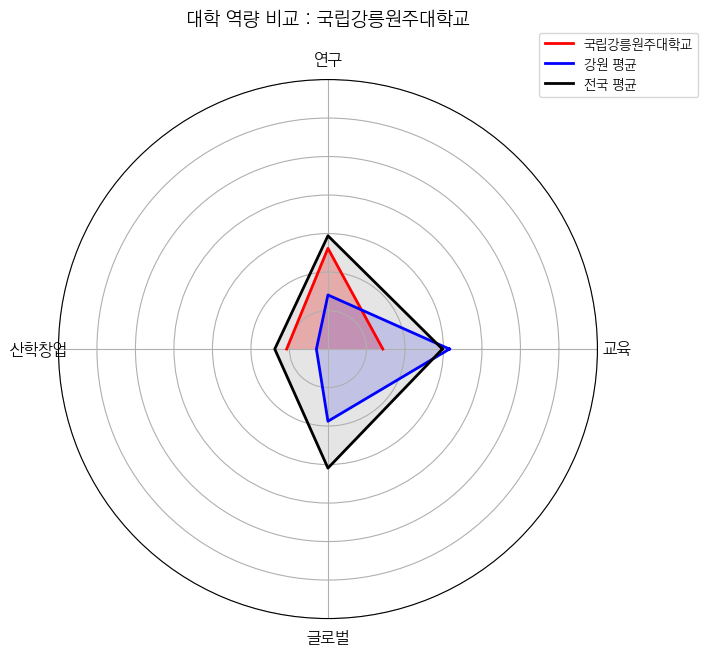

In [152]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

# -----------------------------
# 한글 폰트 설정
# -----------------------------
font_path = r"C:\Users\윤서현\Downloads\KoPubWorld Dotum_Pro Medium.otf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# -----------------------------
# 1. 영역 리스트
# -----------------------------
areas = ["교육", "연구", "산학창업", "글로벌"]

# 특정 대학 선택
school_name = "국립강릉원주대학교"
row = merge_final[merge_final["학교"] == school_name].iloc[0]

# 대학 점수
school_values = [row[area + "_평균"] for area in areas]

# 지역 평균 (같은 '지역' 컬럼 기준)
region = row["지역"]
region_values = merge_final[merge_final["지역"] == region][[area + "_평균" for area in areas]].mean().values

# 전국 평균
national_values = merge_final[[area + "_평균" for area in areas]].mean().values

# -----------------------------
# 2. 레이더 차트 좌표 준비
# -----------------------------
labels = areas
num_vars = len(labels)

angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

school_values = school_values + [school_values[0]]
region_values = region_values.tolist() + [region_values[0]]
national_values = national_values.tolist() + [national_values[0]]

# -----------------------------
# 3. 플롯 그리기
# -----------------------------
fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

# 대학 (빨강)
ax.plot(angles, school_values, color="red", linewidth=2, label=school_name)
ax.fill(angles, school_values, color="red", alpha=0.25)

# 지역 (파랑)
ax.plot(angles, region_values, color="blue", linewidth=2, label=f"{region} 평균")
ax.fill(angles, region_values, color="blue", alpha=0.15)

# 전국 (검정)
ax.plot(angles, national_values, color="black", linewidth=2, label="전국 평균")
ax.fill(angles, national_values, color="black", alpha=0.1)

# 눈금/라벨
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticklabels([])

# 필요 시 범위 확대 (차이 극명하게)
ax.set_ylim(4.7, 5.4)

# 범례
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.title(f"대학 역량 비교 : {school_name}", fontsize=14, pad=20)
plt.show()